# Long vs. Wide Format 🐼

There are two general forms of tabular data: **long** and **wide** format (see Course Material for image).  

**Long:**   
- single value column and a column that contains the variable name for each value
- great for plotting 
- to get a table into long format, use ``stack`` or ``melt``

**Wide:**   
- each variable has its own column
- great for descriptive statistics and Machine Learning
- to get a table into wide format, use ``unstack`` or ``pivot``

Depending on your use case, you might want to represent some information as individual rows of a single column (long format), or represent that same information across multiple, separate columns (wide format).

In [31]:
import pandas as pd

In [32]:
df = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0)
df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


# Warmup: Handling the Index

In [33]:
df.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'South Sudan'],
      dtype='object', name='Life expectancy', length=260)

In [34]:
df.index.name = 'country'
df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [52]:
df.reset_index(inplace = True)
df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [53]:
df_long = df.melt(id_vars= 'country', var_name = 'year', value_name = 'life_expectancy')

In [54]:
df_long.dtypes

country             object
year                object
life_expectancy    float64
dtype: object

In [55]:
df_long['year']=df_long['year'].astype(int)
df_long.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [42]:
df_long.dtypes

country             object
year                 int64
life_expectancy    float64
dtype: object

In [56]:
df_long = df_long.sort_values(by = ['country', 'year'])
df_long.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
260,Abkhazia,1801,NaN
520,Abkhazia,1802,NaN
780,Abkhazia,1803,NaN
1040,Abkhazia,1804,NaN


In [50]:
df.set_index('country', inplace=True)
df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


# Lets bring this table into long format so we can plot it nicely! 
What we want: Three columns, country, year and the life_expectancy-values. So we need to turn columns into rows. 

#### The other way of getting a wide table into long format: 

### Lets plot something: 

In [57]:
germany = df_long[df_long['country'] == 'Germany']

In [59]:
import matplotlib as plt
import seaborn as sns

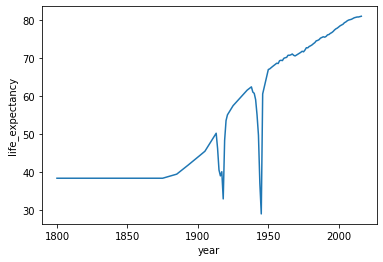

In [61]:
sns.lineplot(data=germany, x='year', y='life_expectancy');

# Lets bring the table back into wide format! (for practice)
- What we want: year as index and countries as columns
- We do the inverse of melting/stacking: pivot or unstack

In [64]:
df_wide = df_long.pivot(index='year', columns='country', values='life_expectancy')
df_wide.head()

country,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Virgin Islands (U.S.),Wallis et Futuna,West Bank and Gaza,West Germany,Western Sahara,Yemen,Yugoslavia,Zambia,Zimbabwe,Åland
year,,,,,,,,,,,,,,,,,,,,,
1800,NaN,28.21,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,...,33.4,NaN,32.1,NaN,34.75,23.39,NaN,32.6,33.7,NaN
1801,NaN,28.20,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,...,33.4,NaN,32.1,NaN,34.75,23.39,NaN,32.6,33.7,NaN
1802,NaN,28.19,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,...,33.4,NaN,32.1,NaN,34.75,23.39,NaN,32.6,33.7,NaN
1803,NaN,28.18,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,...,33.4,NaN,32.1,NaN,34.75,23.39,NaN,32.6,33.7,NaN
1804,NaN,28.17,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,...,33.4,NaN,32.1,NaN,34.75,23.39,NaN,32.6,33.7,NaN


In [ ]:
df.

## One last, neat little trick: 

In [66]:
df_wide.transpose()

year,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,...,65.2,65.7,66.2,66.6,66.6,66.7,67.1,67.1,66.0,64.92
Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,49.0,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10


### Nice resource on reshaping with pandas: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html?highlight=reshape

# Exercises:

 
## 🥳🥳  Start with your first project! 🥳🥳 

Go through the steps here: http://krspiced.pythonanywhere.com/chapters/project_gapminder/long_vs_wide.html  

- Bonus: Read the first couple of pages from the paper "Tidy Data" in the Course Material